In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from chart_studio.plotly import plot_mpl
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, SVAR, VARMAX
import seaborn as sns
from statsmodels.tsa.base.datetools import dates_from_str

In [4]:
data=pd.read_csv("dfp_cost.csv")

In [5]:
data.head()

,active_date,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
0,2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
1,2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2,2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
3,2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
4,2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


In [7]:
data.shape

(39, 14)

In [11]:
data.index = pd.DatetimeIndex(data['active_date'])
data=data.drop(['active_date'], axis=1)

In [12]:
data.head()

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
active_date,,,,,,,,,,,,,
2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


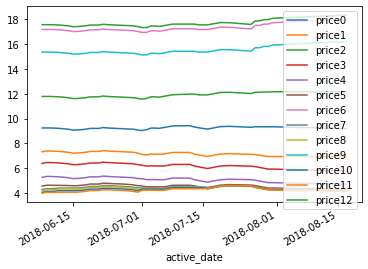

In [13]:
data.plot()

In [14]:
def tsplot(y, title, lags=None, figsize=(10, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

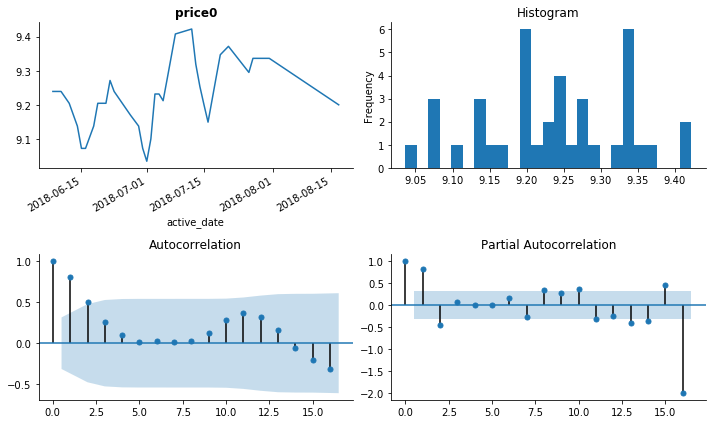

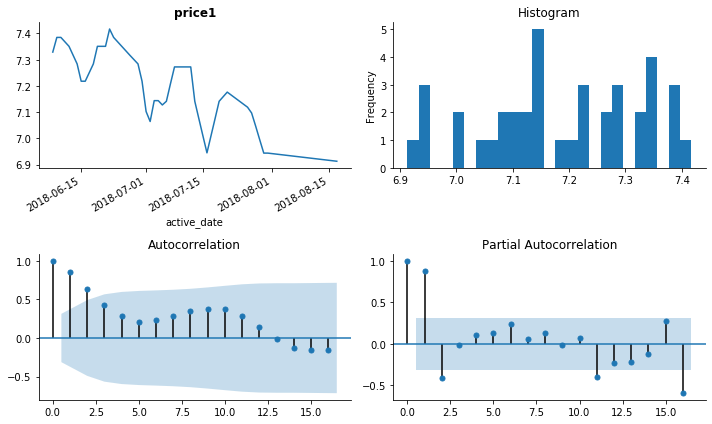

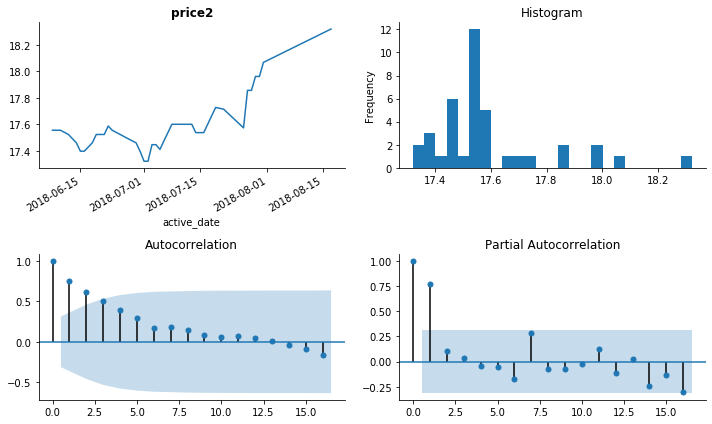

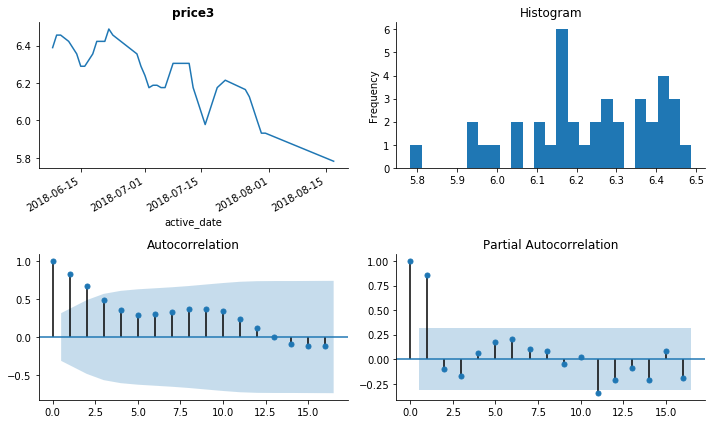

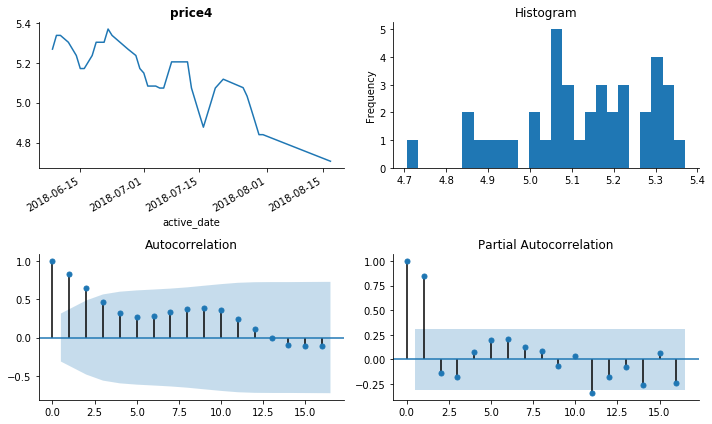

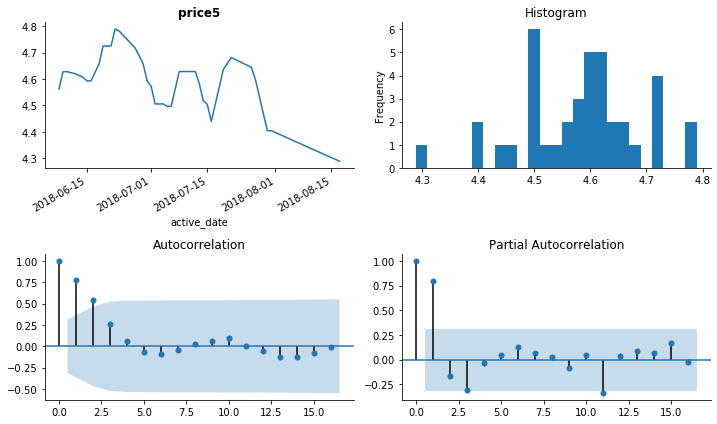

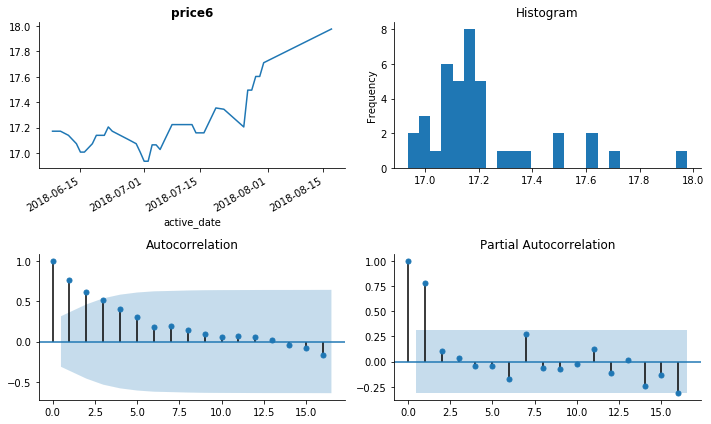

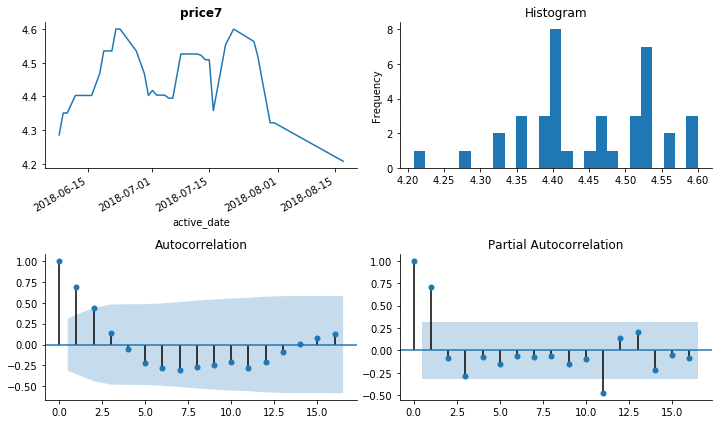

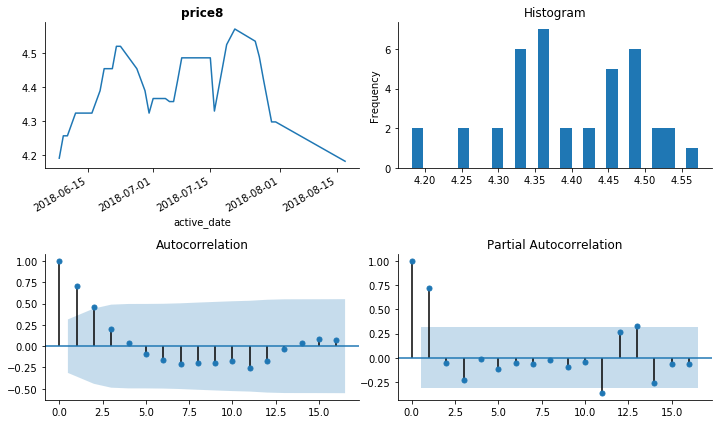

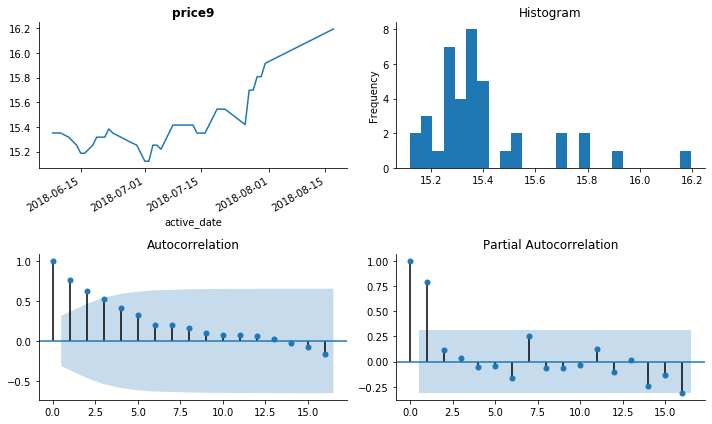

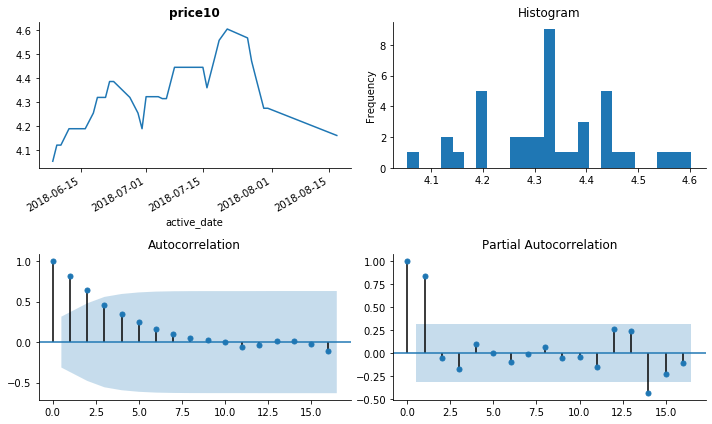

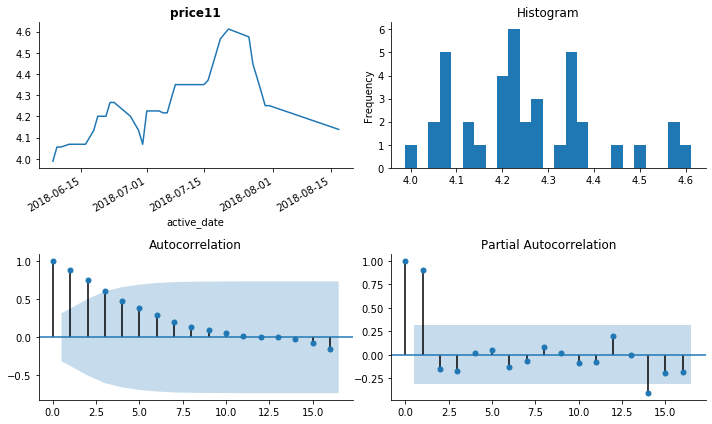

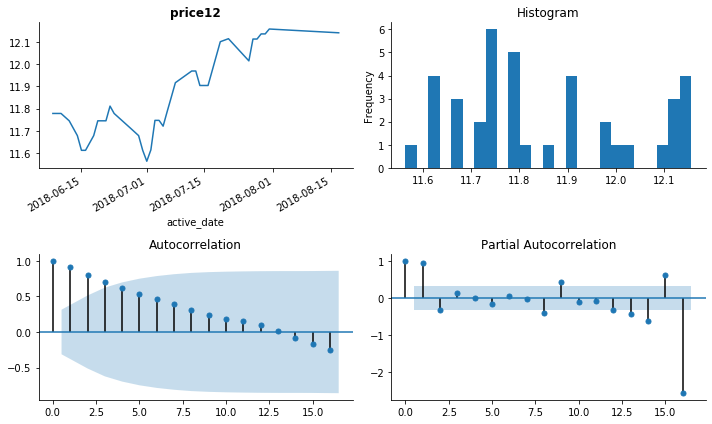

In [16]:
for name in data.columns:
    tsplot(data[name],name)

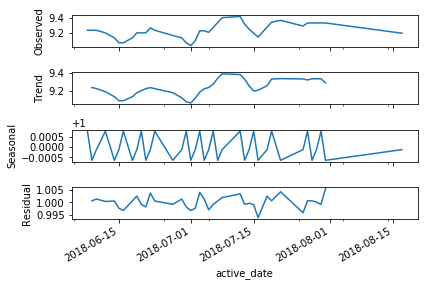

In [21]:
df=data['price0']
result = seasonal_decompose(df, model='multiplicative',freq=3)
result.plot()
plt.show()

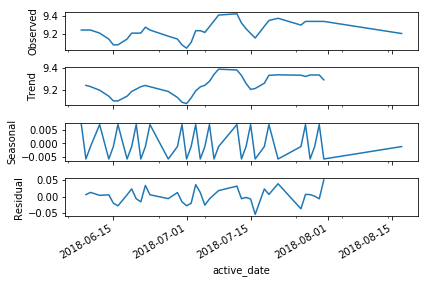

In [22]:
df=data['price0']
result = seasonal_decompose(df, model='additive',freq=3)
result.plot()
plt.show()

# Test stationary

In [38]:
def test_stationarity(timeseries):
    ''' 
    #Determing rolling statistics
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    ''' 
    #perform dickey fuller test  
    #print("Results of dickey fuller test")
    #adft = adfuller(timeseries['Price'],autolag='AIC')
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    #output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    #for key,values in adft[4].items():
    #    output['critical value (%s)'%key] =  values
    #print(output)
    p_value=adft[1]
    return p_value
    #print(p_value)

In [41]:
from termcolor import colored

In [43]:
for name in data.columns:
    #name='price0'
    print(name)
    df=data[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

price0
p-value:  0.033936633983139036
price0 is Stationary
price1
p-value:  0.3210448852232989
price1 is not Stationary
price2
p-value:  0.9979679611633349
price2 is not Stationary
price3
p-value:  0.877447117598773
price3 is not Stationary
price4
p-value:  0.833316228980578
price4 is not Stationary
price5
p-value:  0.6805093728105482
price5 is not Stationary
price6
p-value:  0.9981886631005592
price6 is not Stationary
price7
p-value:  0.5402127847230239
price7 is not Stationary
price8
p-value:  0.3166652085680111
price8 is not Stationary
price9
p-value:  0.9986285320799343
price9 is not Stationary
price10
p-value:  0.3532554826974247
price10 is not Stationary
price11
p-value:  0.42060870854803234
price11 is not Stationary
price12
p-value:  0.9276653317506414
price12 is not Stationary


In [56]:
# first difference
data_log_diff=np.log(data).diff().dropna()
# second difference
#data_log_diff=data_log_diff.diff().dropna()

In [57]:
for name in data.columns:
    #name='price0'
    print(name)
    df=data_log_diff[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

price0
p-value:  0.0031024663665379366
price0 is Stationary
price1
p-value:  0.1468918788040085
price1 is not Stationary
price2
p-value:  1.681210530140243e-05
price2 is Stationary
price3
p-value:  0.005474634292632101
price3 is Stationary
price4
p-value:  0.03523384851993278
price4 is Stationary
price5
p-value:  0.004025373300779096
price5 is Stationary
price6
p-value:  2.3656625319299625e-05
price6 is Stationary
price7
p-value:  8.372313865613255e-05
price7 is Stationary
price8
p-value:  4.124000854382198e-05
price8 is Stationary
price9
p-value:  5.805696937779554e-05
price9 is Stationary
price10
p-value:  0.00015610987213249725
price10 is Stationary
price11
p-value:  0.001282513901847022
price11 is Stationary
price12
p-value:  0.00012852589467721965
price12 is Stationary


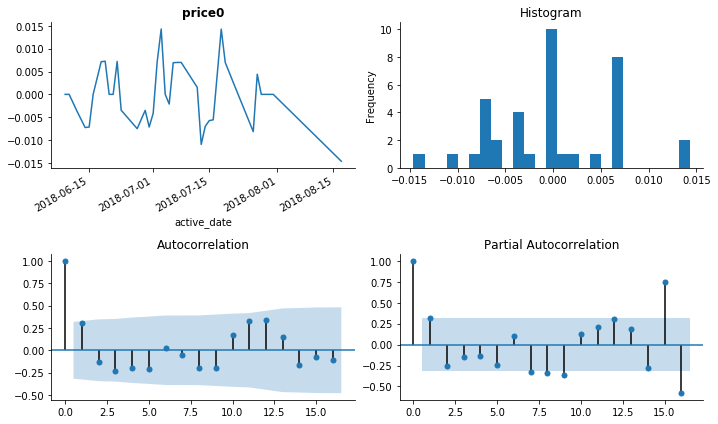

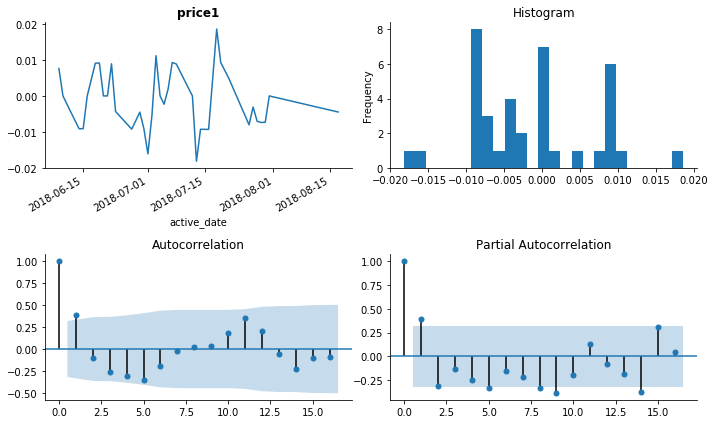

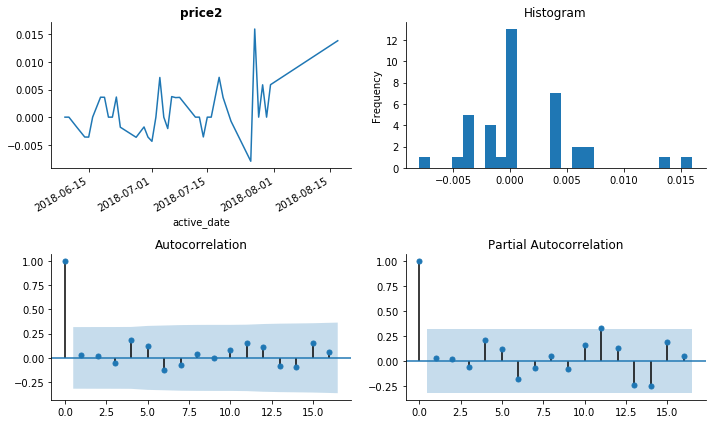

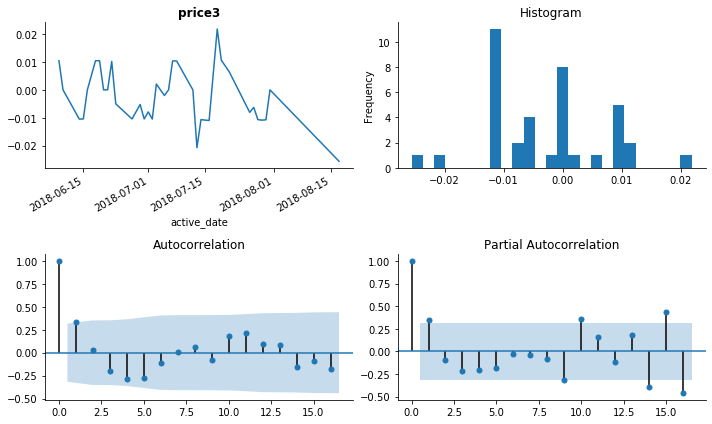

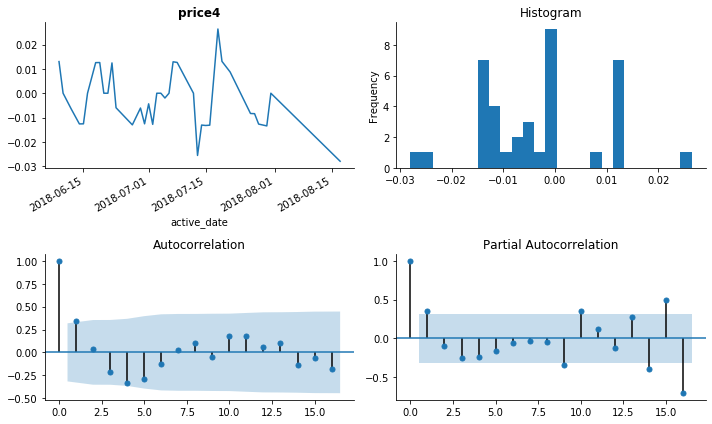

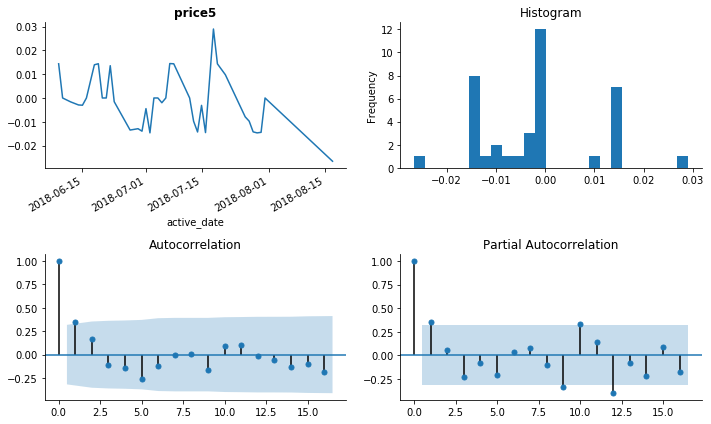

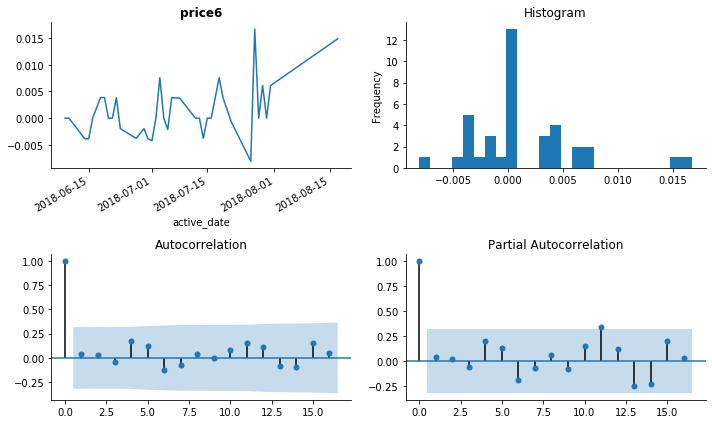

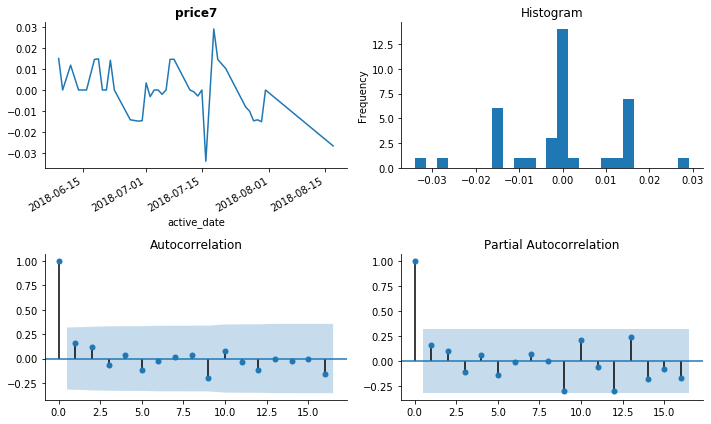

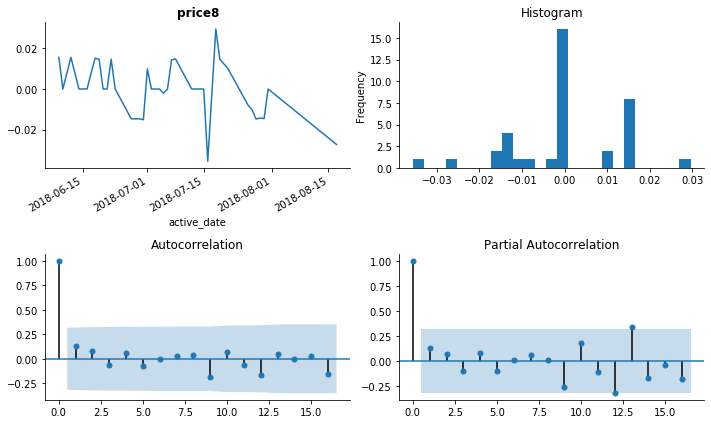

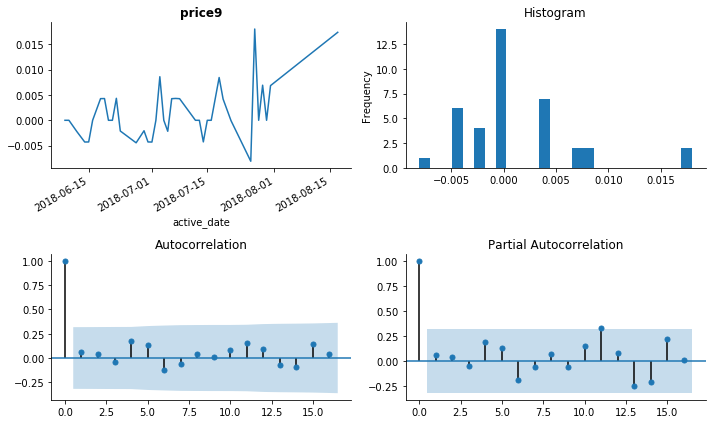

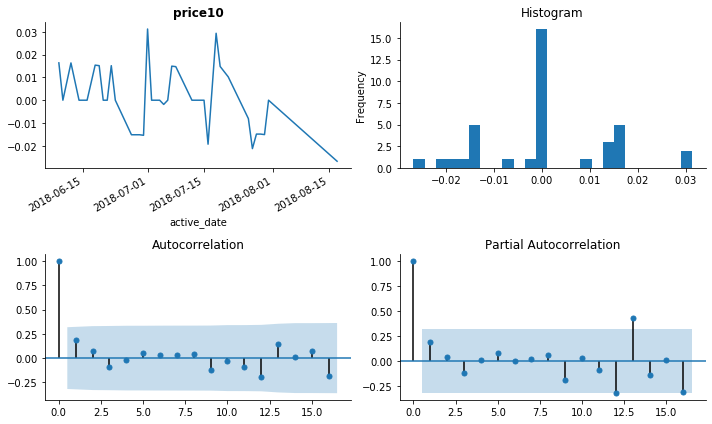

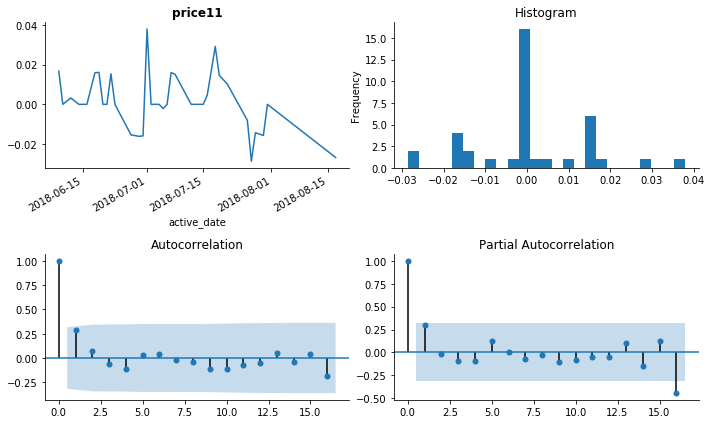

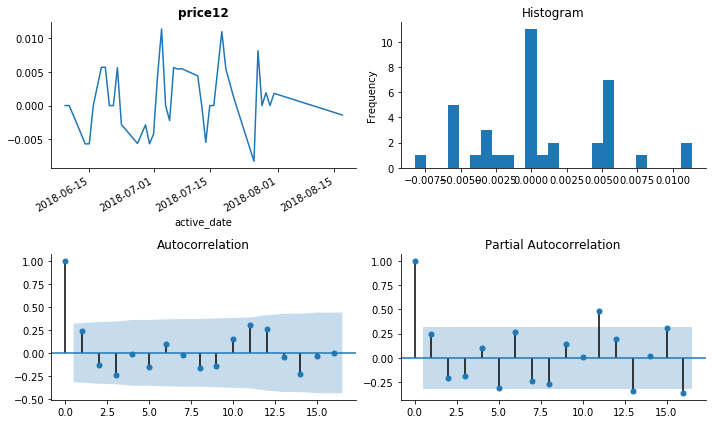

In [58]:
for name in data.columns:
    tsplot(data_log_diff[name],name)

In [83]:
names=data.columns
train=data_log_diff[names[:4]].iloc[:30,]
test=data_log_diff[names[:4]].iloc[30:,]

# VAR model

In [84]:
#model = VARMAX(train, order=(2, 3), trend='c')
model = VARMAX(train, order=(2, 0), trend='c')
model_fit = model.fit(maxiter=500, disp=False)
model_fit.summary()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,"['price0', 'price1', 'price2', 'price3']",No. Observations:,30
Model:,VAR(2),Log Likelihood,566.082
,+ intercept,AIC,-1040.163
Date:,"Sun, 26 Apr 2020",BIC,-975.708
Time:,15:32:48,HQIC,-1019.544
Sample:,0,,
,- 30,,
Covariance Type:,opg,,
Ljung-Box (Q):,nan,Jarque-Bera (JB):,"1.45, 22.47, 39.58, 1.95"
Prob(Q):,nan,Prob(JB):,"0.48, 0.00, 0.00, 0.38"
Heteroskedasticity (H):,"4.49, 0.72, 5.97, 1.75",Skew:,"0.52, -1.23, 1.79, -0.41"


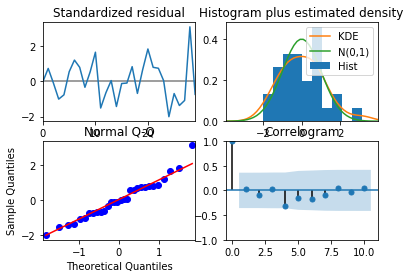

In [85]:
# Model Diagnostic
model_fit.plot_diagnostics()
plt.show()

In [111]:
fc = model_fit.forecast(steps=8)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [149]:
fc

,price0,price1,price2,price3
30,-0.000641,-0.000117,0.000699,-0.001458
31,-0.003744,-0.003645,-0.000762,-0.003809
32,-0.002675,-0.003511,-0.000784,-0.002692
33,-0.000115,-0.001669,0.000257,-0.001673
34,0.001165,-0.000007,0.000983,-0.000688
35,0.000741,0.000135,0.000836,-0.000323
36,-0.000101,-0.000739,0.000377,-0.000882
37,-0.000392,-0.001370,0.000189,-0.001554


In [126]:
df_fc=pd.concat([train,fc],axis=0,ignore_index=True)
df_fc=df_fc.rename(columns={'price0':'fc_price0','price1':'fc_price1','price2':'fc_price2','price3':'fc_price3'})

In [135]:
df_fc.tail()

,fc_price0,fc_price1,fc_price2,fc_price3,price0,price1,price2,price3
33,-0.000115,-0.001669,0.000257,-0.001673,0.000000,-0.007070,0.000000,-0.010666
34,0.001165,-0.000007,0.000983,-0.000688,0.000000,-0.007406,0.005863,-0.010865
35,0.000741,0.000135,0.000836,-0.000323,0.000000,-0.007318,0.000000,-0.010731
36,-0.000101,-0.000739,0.000377,-0.000882,0.000000,0.000000,0.005884,0.000000
37,-0.000392,-0.001370,0.000189,-0.001554,-0.014619,-0.004474,0.013851,-0.025612


In [117]:
#dffc=pd.concat([df_fc,data_log_diff[names[:4]]],axis=1)

In [131]:
for i in range(4):
    df_fc['price'+str(i)]=data_log_diff['price'+str(i)].values

In [136]:
df_fc.head()

,fc_price0,fc_price1,fc_price2,fc_price3,price0,price1,price2,price3
0,0.000000,0.007612,0.000000,0.010432,0.000000,0.007612,0.000000,0.010432
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.003741,-0.004615,-0.001824,-0.005202,-0.003741,-0.004615,-0.001824,-0.005202
3,-0.007250,-0.009156,-0.003602,-0.010487,-0.007250,-0.009156,-0.003602,-0.010487
4,-0.007138,-0.009102,-0.003615,-0.010439,-0.007138,-0.009102,-0.003615,-0.010439


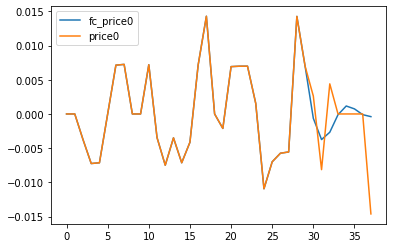

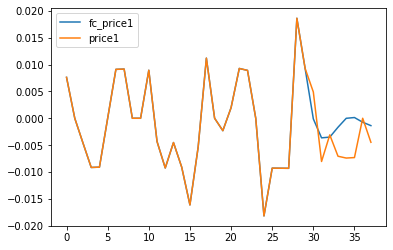

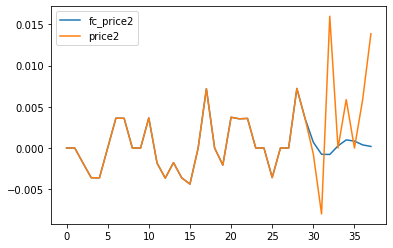

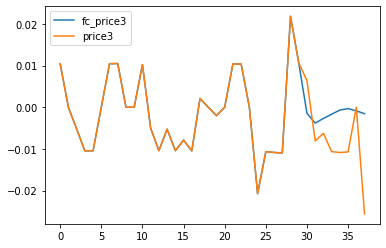

In [134]:
for i in range(4):
    df_fc[['fc_price'+str(i),'price'+str(i)]].plot()

In [ ]:
# inverting transformation
# first difference
#data_log_diff=np.log(data).diff().dropna()

def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [150]:
df1=pd.concat([train,fc],axis=0,ignore_index=True)

In [151]:
df_invt=df1.copy()
columns=df1.columns
for col in columns:
    df_invt[col]=train[col].iloc[-1]+df1[col].cumsum()

In [152]:
df_invt=np.exp(df_invt)

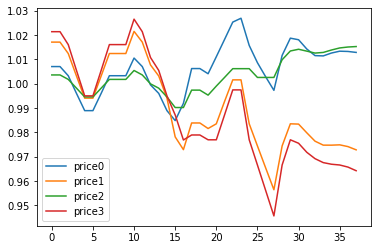

In [153]:
df_invt.plot()

In [146]:
for i in range(4):
    df_invt['actual'+str(i)]=data['price'+str(i)].values[1:39]

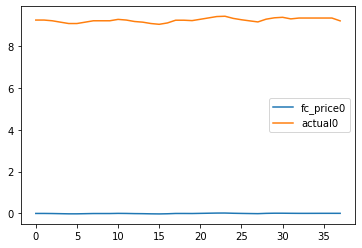

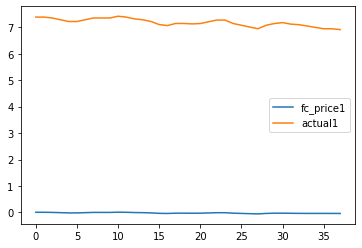

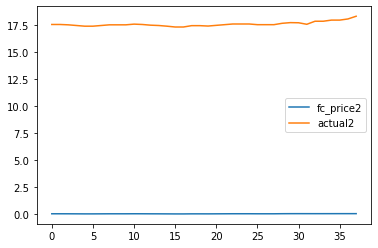

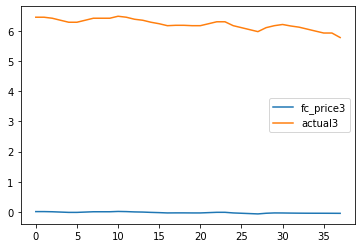

In [147]:
for i in range(4):
    df_invt[['fc_price'+str(i),'actual'+str(i)]].plot()

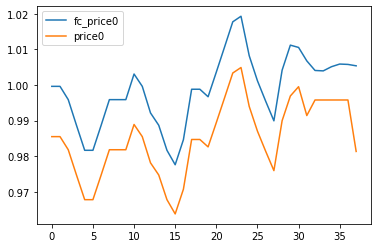

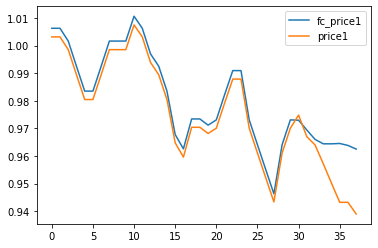

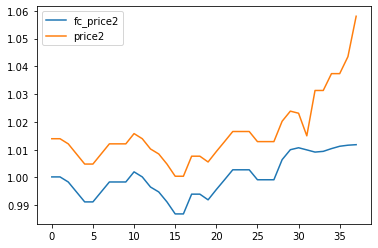

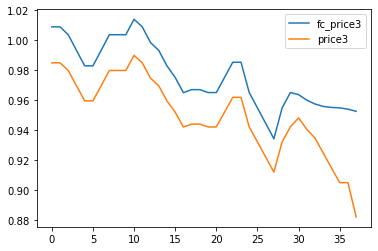

In [139]:
for i in range(4):
    df_invt[['fc_price'+str(i),'price'+str(i)]].plot()

# MA tranformation

In [154]:
dta=data[data.columns[:4]]

In [155]:
dta.head()

,price0,price1,price2,price3
active_date,,,,
2018-06-08,9.2400,7.329,17.556,6.3890
2018-06-09,9.2400,7.385,17.556,6.4560
2018-06-10,9.2400,7.385,17.556,6.4560
2018-06-12,9.2055,7.351,17.524,6.4225
2018-06-14,9.1390,7.284,17.461,6.3555


In [164]:
for name in dta.columns:
    #name='price0'
    print(name)
    df=dta[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

price0
p-value:  0.033936633983139036
price0 is Stationary
price1
p-value:  0.3210448852232989
price1 is not Stationary
price2
p-value:  0.9979679611633349
price2 is not Stationary
price3
p-value:  0.877447117598773
price3 is not Stationary


In [157]:
dta_ma3 = dta.rolling(3).mean()

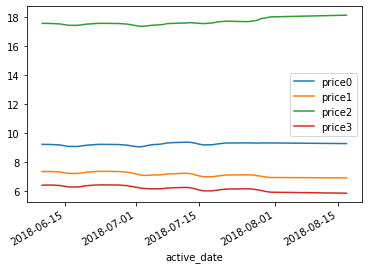

In [158]:
dta_ma3.plot()

In [166]:
dta_1_ma3=dta-dta_ma3
dta_1_ma3=dta_1_ma3.dropna()

In [167]:
for name in dta_1_ma3.columns:
    #name='price0'
    print(name)
    df=dta_1_ma3[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

price0
p-value:  0.0001541353939204181
price0 is Stationary
price1
p-value:  0.015900139577762797
price1 is Stationary
price2
p-value:  0.03812657242002423
price2 is Stationary
price3
p-value:  0.0025296039104853404
price3 is Stationary


In [169]:
dta_1_ma3.shape# (37,4)

(37, 4)

In [174]:
data.head()

,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
active_date,,,,,,,,,,,,,
2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


In [175]:
dta_1_ma3.head()

,price0,price1,price2,price3
active_date,,,,
2018-06-10,0.000000,0.018667,0.000000,0.022333
2018-06-12,-0.023000,-0.022667,-0.021333,-0.022333
2018-06-14,-0.055833,-0.056000,-0.052667,-0.055833
2018-06-15,-0.065500,-0.066333,-0.063000,-0.066333
2018-06-16,-0.021667,-0.022000,-0.021000,-0.022000


In [170]:
train=dta_1_ma3.iloc[:30,]
test=dta_1_ma3.iloc[30:,]

In [171]:
#model = VARMAX(train, order=(2, 3), trend='c')
model = VARMAX(train, order=(2, 0), trend='c')
model_fit = model.fit(maxiter=500, disp=False)
model_fit.summary()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,"['price0', 'price1', 'price2', 'price3']",No. Observations:,30
Model:,VAR(2),Log Likelihood,352.911
,+ intercept,AIC,-613.822
Date:,"Sun, 26 Apr 2020",BIC,-549.367
Time:,16:11:25,HQIC,-593.202
Sample:,0,,
,- 30,,
Covariance Type:,opg,,
Ljung-Box (Q):,nan,Jarque-Bera (JB):,"3.03, 47.43, 21.07, 1.47"
Prob(Q):,nan,Prob(JB):,"0.22, 0.00, 0.00, 0.48"
Heteroskedasticity (H):,"2.13, 0.63, 6.12, 1.30",Skew:,"0.77, -1.87, 1.16, -0.26"


In [176]:
fc = model_fit.forecast(steps=7)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [177]:
fc

,price0,price1,price2,price3
30,-0.021704,-0.026488,-0.023752,-0.030360
31,-0.051601,-0.057622,-0.043887,-0.056987
32,-0.033407,-0.047319,-0.030384,-0.043589
33,0.004692,-0.016003,0.001453,-0.015127
34,0.030382,0.010370,0.023880,0.006137
35,0.029208,0.015032,0.025005,0.008858
36,0.010887,0.001787,0.010731,-0.002129


In [214]:
df2=pd.concat([train,fc],axis=0,ignore_index=True)

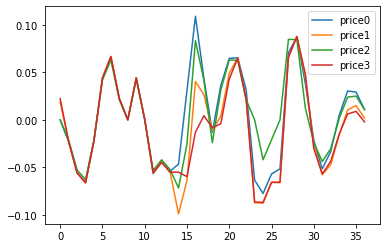

In [215]:
df2.plot()

In [216]:
for i in range(4):
    df2['tprice'+str(i)]=dta_1_ma3['price'+str(i)].values

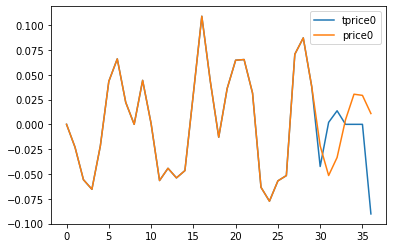

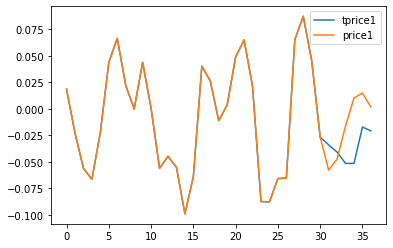

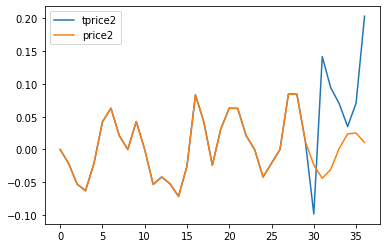

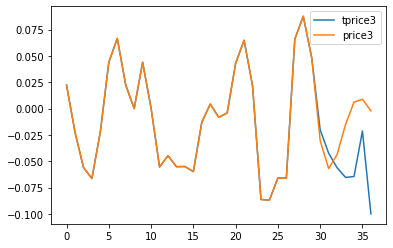

In [217]:
for i in range(4):
    df2[['tprice'+str(i),'price'+str(i)]].plot()

# invert tranformation

In [218]:
dta_ma3=dta_ma3.dropna()

In [219]:
for i in range(4):
    df2['tprice'+str(i)]=df2['tprice'+str(i)].values+dta_ma3['price'+str(i)].values
    df2['price'+str(i)]=df2['price'+str(i)].values+dta_ma3['price'+str(i)].values

In [220]:
df2.head()

,price0,price1,price2,price3,tprice0,tprice1,tprice2,tprice3
0,9.2400,7.385,17.556,6.4560,9.2400,7.385,17.556,6.4560
1,9.2055,7.351,17.524,6.4225,9.2055,7.351,17.524,6.4225
2,9.1390,7.284,17.461,6.3555,9.1390,7.284,17.461,6.3555
3,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895
4,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895


In [ ]:
dat

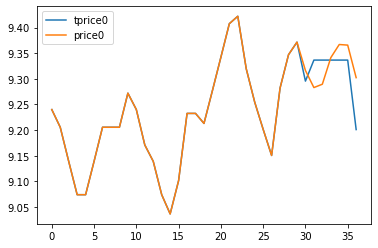

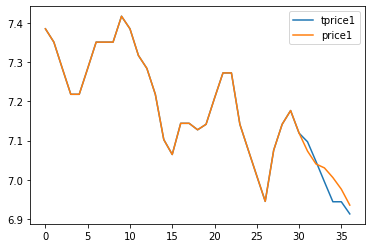

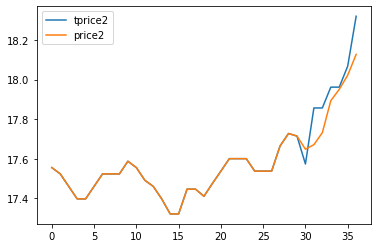

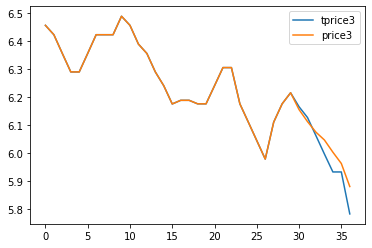

In [221]:
for i in range(4):
    df2[['tprice'+str(i),'price'+str(i)]].plot()

In [225]:
for i in range(4): 
    df2['original'+str(i)]=data['price'+str(i)].values[2:]

In [226]:
df2.head()

,price0,price1,price2,price3,tprice0,tprice1,tprice2,tprice3,original0,original1,original2,original3
0,9.2400,7.385,17.556,6.4560,9.2400,7.385,17.556,6.4560,9.2400,7.385,17.556,6.4560
1,9.2055,7.351,17.524,6.4225,9.2055,7.351,17.524,6.4225,9.2055,7.351,17.524,6.4225
2,9.1390,7.284,17.461,6.3555,9.1390,7.284,17.461,6.3555,9.1390,7.284,17.461,6.3555
3,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895
4,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895,9.0740,7.218,17.398,6.2895
